In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 24 kB/s 
     |████████████████████████████████| 199 kB 70.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=162459561a7d97eea3236d65062f17f47bff6a38f4ca0cf4ffda2b498e4a32ec
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark

In [4]:
import pandas as pd
import numpy as np
from pyspark.sql import functions as F
import seaborn as sns
from pyspark.sql.functions import *

In [5]:
train_data=spark.read.csv('/content/drive/My Drive/Turingminds/5271_Bikash_Batch124/train.csv',inferSchema=True,header=True)

In [6]:
test_data=spark.read.csv('/content/drive/My Drive/Turingminds/5271_Bikash_Batch124/test.csv',inferSchema=True,header=True)

In [7]:
train_data.describe().show()

+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|summary|      PassengerId|           Survived|            Pclass|                Name|   Sex|               Age|             SibSp|              Parch|            Ticket|             Fare|Cabin|Embarked|
+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|  count|              891|                891|               891|                 891|   891|               714|               891|                891|               891|              891|  204|     889|
|   mean|            446.0| 0.3838383838383838| 2.308641975308642|                null|  null| 29.69911764705882|0.5230078563411896|0.38159371492704824|260318.54916792738| 32.20420

In [8]:
test_data.describe().show()

+-------+------------------+------------------+--------------------+------+------------------+------------------+------------------+------------------+------------------+-----+--------+
|summary|       PassengerId|            Pclass|                Name|   Sex|               Age|             SibSp|             Parch|            Ticket|              Fare|Cabin|Embarked|
+-------+------------------+------------------+--------------------+------+------------------+------------------+------------------+------------------+------------------+-----+--------+
|  count|               418|               418|                 418|   418|               332|               418|               418|               418|               417|   91|     418|
|   mean|            1100.5|2.2655502392344498|                null|  null|30.272590361445783|0.4473684210526316|0.3923444976076555|223850.98986486485|  35.6271884892086| null|    null|
| stddev|120.81045760473994|0.8418375519640503|                null|  

In [9]:
train_data.groupBy("Sex").count().show()

+------+-----+
|   Sex|count|
+------+-----+
|female|  314|
|  male|  577|
+------+-----+



In [10]:
train_data.groupBy("sex","Survived").count().show()

+------+--------+-----+
|   sex|Survived|count|
+------+--------+-----+
|  male|       0|  468|
|female|       1|  233|
|female|       0|   81|
|  male|       1|  109|
+------+--------+-----+



In [11]:
train_data.groupBy("Survived").count().show()

+--------+-----+
|Survived|count|
+--------+-----+
|       1|  342|
|       0|  549|
+--------+-----+



In [12]:
train_data.select("Survived","Pclass","Embarked").show()


+--------+------+--------+
|Survived|Pclass|Embarked|
+--------+------+--------+
|       0|     3|       S|
|       1|     1|       C|
|       1|     3|       S|
|       1|     1|       S|
|       0|     3|       S|
|       0|     3|       Q|
|       0|     1|       S|
|       0|     3|       S|
|       1|     3|       S|
|       1|     2|       C|
|       1|     3|       S|
|       1|     1|       S|
|       0|     3|       S|
|       0|     3|       S|
|       0|     3|       S|
|       1|     2|       S|
|       0|     3|       Q|
|       1|     2|       S|
|       0|     3|       S|
|       1|     3|       C|
+--------+------+--------+
only showing top 20 rows



In [13]:
train_df=train_data.drop('PassengerId','Name','Ticket','Cabin')

In [14]:
test_df=test_data.drop('PassengerId','Name','Ticket','Cabin')

In [15]:
train_df.show(2)

+--------+------+------+----+-----+-----+-------+--------+
|Survived|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|
+--------+------+------+----+-----+-----+-------+--------+
|       0|     3|  male|22.0|    1|    0|   7.25|       S|
|       1|     1|female|38.0|    1|    0|71.2833|       C|
+--------+------+------+----+-----+-----+-------+--------+
only showing top 2 rows



In [16]:
test_df.show(2)

+------+------+----+-----+-----+------+--------+
|Pclass|   Sex| Age|SibSp|Parch|  Fare|Embarked|
+------+------+----+-----+-----+------+--------+
|     3|  male|34.5|    0|    0|7.8292|       Q|
|     3|female|47.0|    1|    0|   7.0|       S|
+------+------+----+-----+-----+------+--------+
only showing top 2 rows



In [17]:
traindf=train_df.toPandas()

In [18]:
testdf=test_df.toPandas()

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

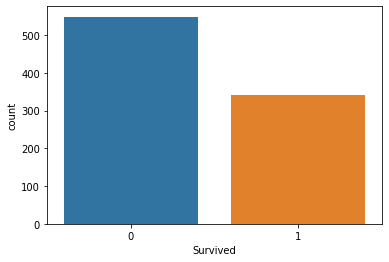

In [20]:
sns.countplot(x="Survived",data=traindf)
plt.show()

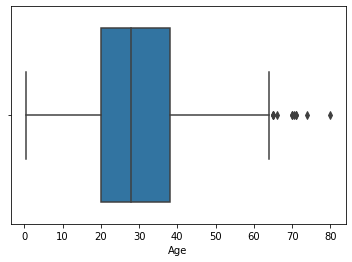

In [21]:
sns.boxplot(x="Age",data=traindf)
plt.show()

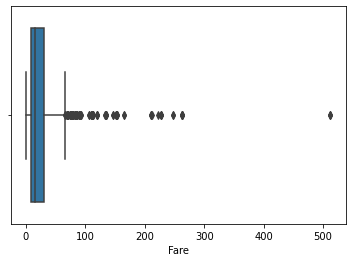

In [22]:
sns.boxplot(x="Fare",data=traindf)
plt.show()

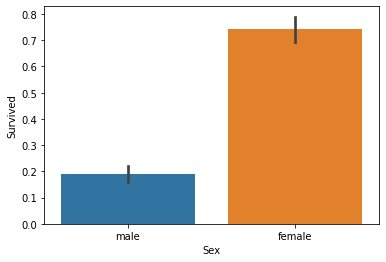

In [23]:
sns.barplot(x="Sex",y="Survived",data=traindf)

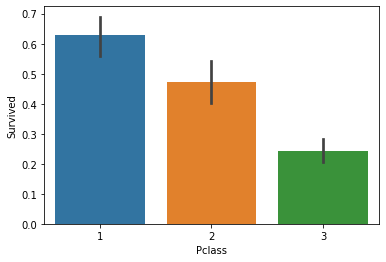

In [24]:
sns.barplot(x="Pclass",y="Survived",data=traindf)

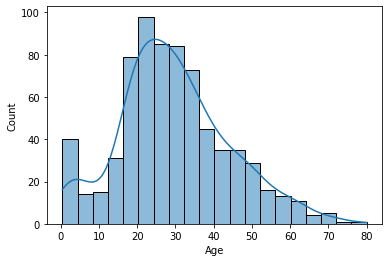

In [25]:
sns.histplot(x="Age",data=traindf,kde=True)

In [26]:
traindf.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [27]:
testdf.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [28]:
traindf.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
testdf.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [30]:
traindf1=traindf.fillna(method="pad")
traindf1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,19.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [31]:
testdf1=testdf.fillna(method="pad")
testdf1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,28.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,38.5,0,0,8.0500,S


In [32]:
traindf1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
type(traindf1)

pandas.core.frame.DataFrame

In [34]:
testdf1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

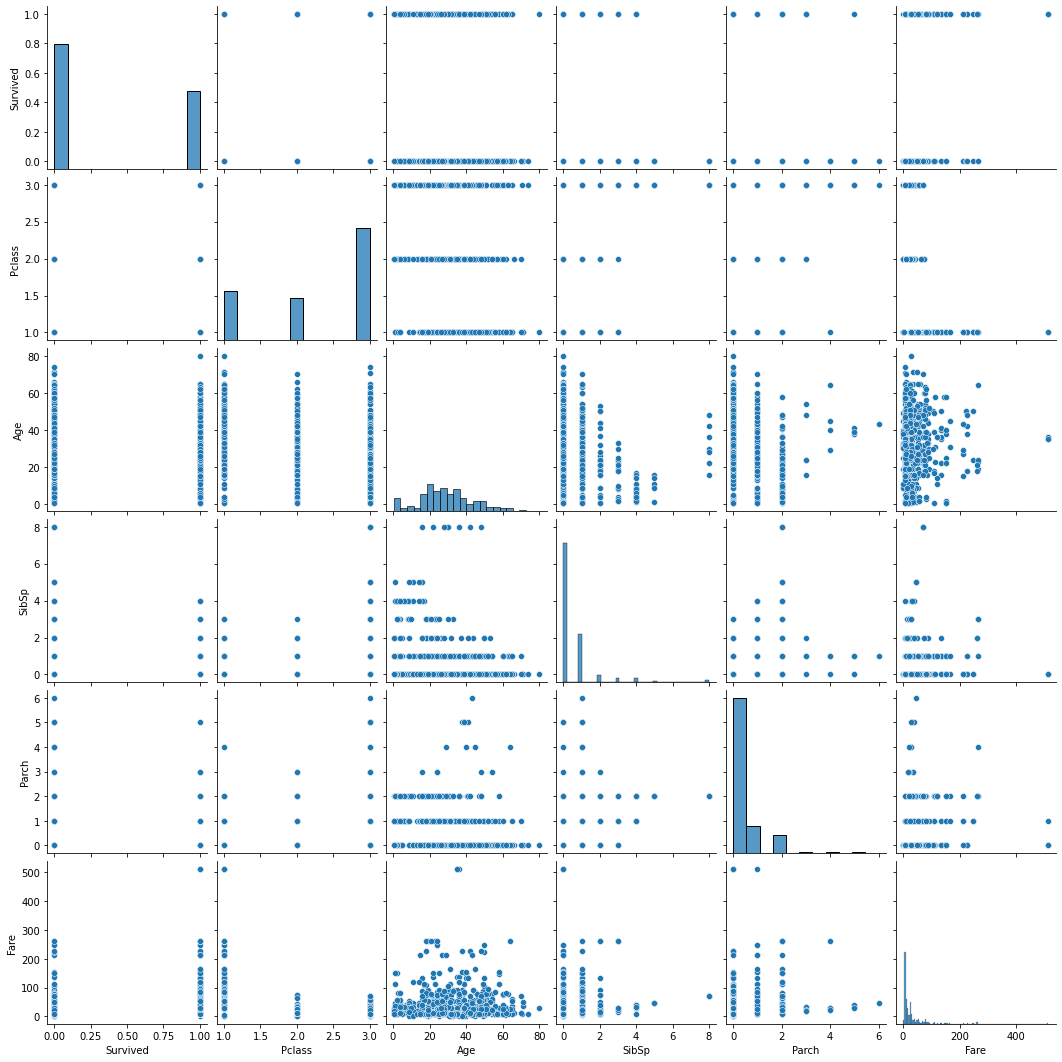

In [35]:
sns.pairplot(traindf1) #pair plot 

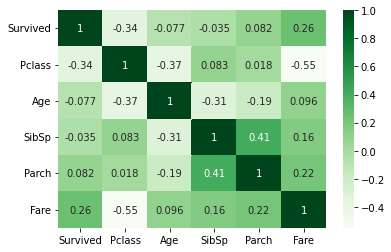

In [36]:
sns.heatmap(traindf.corr(),annot=True,cmap='Greens') #correlation plot

In [37]:
from pyspark.sql.types import *

train_Schema = StructType([
    StructField("Survived",IntegerType(),True),
    StructField("Pclass", IntegerType(),True),
    StructField("Sex", StringType(),True),
    StructField("Age", DoubleType(),True),
    StructField("SibSp", IntegerType(),True),
    StructField("Parch", IntegerType(),True),
    StructField("Fare", DoubleType(),True),
    StructField("Embarked",StringType(),True)
])

In [38]:
test_Schema = StructType([
    StructField("Pclass", IntegerType(),True),
    StructField("Sex", StringType(),True),
    StructField("Age", DoubleType(),True),
    StructField("SibSp", IntegerType(),True),
    StructField("Parch", IntegerType(),True),
    StructField("Fare", DoubleType(),True),
    StructField("Embarked",StringType(),True)
])

In [39]:
train_spark=spark.createDataFrame(traindf1,schema=train_Schema)

In [40]:
test_spark=spark.createDataFrame(testdf1,schema=test_Schema)

In [41]:
train_spark.show()

+--------+------+------+----+-----+-----+-------+--------+
|Survived|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|
+--------+------+------+----+-----+-----+-------+--------+
|       0|     3|  male|22.0|    1|    0|   7.25|       S|
|       1|     1|female|38.0|    1|    0|71.2833|       C|
|       1|     3|female|26.0|    0|    0|  7.925|       S|
|       1|     1|female|35.0|    1|    0|   53.1|       S|
|       0|     3|  male|35.0|    0|    0|   8.05|       S|
|       0|     3|  male|35.0|    0|    0| 8.4583|       Q|
|       0|     1|  male|54.0|    0|    0|51.8625|       S|
|       0|     3|  male| 2.0|    3|    1| 21.075|       S|
|       1|     3|female|27.0|    0|    2|11.1333|       S|
|       1|     2|female|14.0|    1|    0|30.0708|       C|
|       1|     3|female| 4.0|    1|    1|   16.7|       S|
|       1|     1|female|58.0|    0|    0|  26.55|       S|
|       0|     3|  male|20.0|    0|    0|   8.05|       S|
|       0|     3|  male|39.0|    1|    5| 31.275|       

In [42]:
test_spark.show()

+------+------+----+-----+-----+-------+--------+
|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|
+------+------+----+-----+-----+-------+--------+
|     3|  male|34.5|    0|    0| 7.8292|       Q|
|     3|female|47.0|    1|    0|    7.0|       S|
|     2|  male|62.0|    0|    0| 9.6875|       Q|
|     3|  male|27.0|    0|    0| 8.6625|       S|
|     3|female|22.0|    1|    1|12.2875|       S|
|     3|  male|14.0|    0|    0|  9.225|       S|
|     3|female|30.0|    0|    0| 7.6292|       Q|
|     2|  male|26.0|    1|    1|   29.0|       S|
|     3|female|18.0|    0|    0| 7.2292|       C|
|     3|  male|21.0|    2|    0|  24.15|       S|
|     3|  male|21.0|    0|    0| 7.8958|       S|
|     1|  male|46.0|    0|    0|   26.0|       S|
|     1|female|23.0|    1|    0|82.2667|       S|
|     2|  male|63.0|    1|    0|   26.0|       S|
|     1|female|47.0|    1|    0| 61.175|       S|
|     2|female|24.0|    1|    0|27.7208|       C|
|     2|  male|35.0|    0|    0|  12.35|       Q|


In [43]:
train_spark.printSchema()

root
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Embarked: string (nullable = true)



In [44]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer

In [45]:
train_spark.columns

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [46]:
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(train_spark) for column in ["Sex","Embarked"]]
pipeline = Pipeline(stages=indexers)
train_spark = pipeline.fit(train_spark).transform(train_spark)

In [47]:
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(test_spark) for column in ["Sex","Embarked"]]
pipeline = Pipeline(stages=indexers)
test_spark = pipeline.fit(test_spark).transform(test_spark)
test_spark.show()

+------+------+----+-----+-----+-------+--------+---------+--------------+
|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|Sex_index|Embarked_index|
+------+------+----+-----+-----+-------+--------+---------+--------------+
|     3|  male|34.5|    0|    0| 7.8292|       Q|      0.0|           2.0|
|     3|female|47.0|    1|    0|    7.0|       S|      1.0|           0.0|
|     2|  male|62.0|    0|    0| 9.6875|       Q|      0.0|           2.0|
|     3|  male|27.0|    0|    0| 8.6625|       S|      0.0|           0.0|
|     3|female|22.0|    1|    1|12.2875|       S|      1.0|           0.0|
|     3|  male|14.0|    0|    0|  9.225|       S|      0.0|           0.0|
|     3|female|30.0|    0|    0| 7.6292|       Q|      1.0|           2.0|
|     2|  male|26.0|    1|    1|   29.0|       S|      0.0|           0.0|
|     3|female|18.0|    0|    0| 7.2292|       C|      1.0|           1.0|
|     3|  male|21.0|    2|    0|  24.15|       S|      0.0|           0.0|
|     3|  male|21.0|    0

In [48]:
train_spark.show(10)

+--------+------+------+----+-----+-----+-------+--------+---------+--------------+
|Survived|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|Sex_index|Embarked_index|
+--------+------+------+----+-----+-----+-------+--------+---------+--------------+
|       0|     3|  male|22.0|    1|    0|   7.25|       S|      0.0|           0.0|
|       1|     1|female|38.0|    1|    0|71.2833|       C|      1.0|           1.0|
|       1|     3|female|26.0|    0|    0|  7.925|       S|      1.0|           0.0|
|       1|     1|female|35.0|    1|    0|   53.1|       S|      1.0|           0.0|
|       0|     3|  male|35.0|    0|    0|   8.05|       S|      0.0|           0.0|
|       0|     3|  male|35.0|    0|    0| 8.4583|       Q|      0.0|           2.0|
|       0|     1|  male|54.0|    0|    0|51.8625|       S|      0.0|           0.0|
|       0|     3|  male| 2.0|    3|    1| 21.075|       S|      0.0|           0.0|
|       1|     3|female|27.0|    0|    2|11.1333|       S|      1.0|        

In [49]:
test_spark.show(10)

+------+------+----+-----+-----+-------+--------+---------+--------------+
|Pclass|   Sex| Age|SibSp|Parch|   Fare|Embarked|Sex_index|Embarked_index|
+------+------+----+-----+-----+-------+--------+---------+--------------+
|     3|  male|34.5|    0|    0| 7.8292|       Q|      0.0|           2.0|
|     3|female|47.0|    1|    0|    7.0|       S|      1.0|           0.0|
|     2|  male|62.0|    0|    0| 9.6875|       Q|      0.0|           2.0|
|     3|  male|27.0|    0|    0| 8.6625|       S|      0.0|           0.0|
|     3|female|22.0|    1|    1|12.2875|       S|      1.0|           0.0|
|     3|  male|14.0|    0|    0|  9.225|       S|      0.0|           0.0|
|     3|female|30.0|    0|    0| 7.6292|       Q|      1.0|           2.0|
|     2|  male|26.0|    1|    1|   29.0|       S|      0.0|           0.0|
|     3|female|18.0|    0|    0| 7.2292|       C|      1.0|           1.0|
|     3|  male|21.0|    2|    0|  24.15|       S|      0.0|           0.0|
+------+------+----+-----

In [50]:
train_spark1=train_spark.drop("Sex","Embarked")
train_spark1.show(2)

+--------+------+----+-----+-----+-------+---------+--------------+
|Survived|Pclass| Age|SibSp|Parch|   Fare|Sex_index|Embarked_index|
+--------+------+----+-----+-----+-------+---------+--------------+
|       0|     3|22.0|    1|    0|   7.25|      0.0|           0.0|
|       1|     1|38.0|    1|    0|71.2833|      1.0|           1.0|
+--------+------+----+-----+-----+-------+---------+--------------+
only showing top 2 rows



In [51]:
test_spark1=test_spark.drop("Sex","Embarked")
test_spark1.show(2)

+------+----+-----+-----+------+---------+--------------+
|Pclass| Age|SibSp|Parch|  Fare|Sex_index|Embarked_index|
+------+----+-----+-----+------+---------+--------------+
|     3|34.5|    0|    0|7.8292|      0.0|           2.0|
|     3|47.0|    1|    0|   7.0|      1.0|           0.0|
+------+----+-----+-----+------+---------+--------------+
only showing top 2 rows



In [52]:
from pyspark.ml.feature import VectorAssembler
feature = VectorAssembler(inputCols=train_spark1.columns[1:],outputCol="features")
feature_vector= feature.transform(train_spark1)
feature_vector.show()

+--------+------+----+-----+-----+-------+---------+--------------+--------------------+
|Survived|Pclass| Age|SibSp|Parch|   Fare|Sex_index|Embarked_index|            features|
+--------+------+----+-----+-----+-------+---------+--------------+--------------------+
|       0|     3|22.0|    1|    0|   7.25|      0.0|           0.0|[3.0,22.0,1.0,0.0...|
|       1|     1|38.0|    1|    0|71.2833|      1.0|           1.0|[1.0,38.0,1.0,0.0...|
|       1|     3|26.0|    0|    0|  7.925|      1.0|           0.0|[3.0,26.0,0.0,0.0...|
|       1|     1|35.0|    1|    0|   53.1|      1.0|           0.0|[1.0,35.0,1.0,0.0...|
|       0|     3|35.0|    0|    0|   8.05|      0.0|           0.0|(7,[0,1,4],[3.0,3...|
|       0|     3|35.0|    0|    0| 8.4583|      0.0|           2.0|[3.0,35.0,0.0,0.0...|
|       0|     1|54.0|    0|    0|51.8625|      0.0|           0.0|(7,[0,1,4],[1.0,5...|
|       0|     3| 2.0|    3|    1| 21.075|      0.0|           0.0|[3.0,2.0,3.0,1.0,...|
|       1|     3|27.0

In [53]:
(trainingData, testData) = feature_vector.randomSplit([0.8, 0.2],seed = 1234)

Logistic Regression

In [54]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="Survived", featuresCol="features")
#Training algo
lrModel = lr.fit(trainingData)
lr_prediction = lrModel.transform(testData)
lr_prediction.select("prediction", "features").show()

+----------+--------------------+
|prediction|            features|
+----------+--------------------+
|       1.0|[1.0,4.0,0.0,0.0,...|
|       0.0|[1.0,19.0,3.0,2.0...|
|       0.0|[1.0,42.0,1.0,0.0...|
|       0.0|(7,[0,1,4],[1.0,4...|
|       0.0|[1.0,45.0,1.0,0.0...|
|       0.0|(7,[0,1,4],[1.0,4...|
|       0.0|[1.0,46.0,1.0,0.0...|
|       0.0|(7,[0,1,4],[1.0,6...|
|       0.0|(7,[0,1,4],[2.0,1...|
|       0.0|(7,[0,1,4],[2.0,2...|
|       1.0|[2.0,24.0,0.0,0.0...|
|       0.0|(7,[0,1,4],[2.0,2...|
|       1.0|[2.0,27.0,1.0,0.0...|
|       0.0|(7,[0,1,4],[2.0,2...|
|       0.0|(7,[0,1,4],[2.0,3...|
|       0.0|[2.0,30.0,1.0,0.0...|
|       0.0|(7,[0,1,4],[2.0,3...|
|       0.0|[2.0,34.0,1.0,0.0...|
|       0.0|[2.0,36.0,0.0,0.0...|
|       0.0|[2.0,44.0,1.0,0.0...|
+----------+--------------------+
only showing top 20 rows



In [69]:
#lr_prediction.select('prediction','Survived').write.save('drive/My Drive/Turingminds/5271_Bikash_Batch124/LogisticRegg/LogRegg.csv', 
                       #   format='com.databricks.spark.csv', 
                        #  header='true',inferSchema='true')

In [56]:
evaluator = MulticlassClassificationEvaluator(labelCol="Survived", predictionCol="prediction", metricName="accuracy")
lr_accuracy = evaluator.evaluate(lr_prediction)
lr_accuracy

0.8

DecisionTree

In [57]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol="Survived", featuresCol="features")
dt_model = dt.fit(trainingData)
dt_prediction = dt_model.transform(testData)
dt_prediction.select("prediction", "features").show()

+----------+--------------------+
|prediction|            features|
+----------+--------------------+
|       0.0|[1.0,4.0,0.0,0.0,...|
|       0.0|[1.0,19.0,3.0,2.0...|
|       0.0|[1.0,42.0,1.0,0.0...|
|       0.0|(7,[0,1,4],[1.0,4...|
|       0.0|[1.0,45.0,1.0,0.0...|
|       0.0|(7,[0,1,4],[1.0,4...|
|       0.0|[1.0,46.0,1.0,0.0...|
|       0.0|(7,[0,1,4],[1.0,6...|
|       0.0|(7,[0,1,4],[2.0,1...|
|       0.0|(7,[0,1,4],[2.0,2...|
|       1.0|[2.0,24.0,0.0,0.0...|
|       0.0|(7,[0,1,4],[2.0,2...|
|       1.0|[2.0,27.0,1.0,0.0...|
|       0.0|(7,[0,1,4],[2.0,2...|
|       0.0|(7,[0,1,4],[2.0,3...|
|       0.0|[2.0,30.0,1.0,0.0...|
|       0.0|(7,[0,1,4],[2.0,3...|
|       0.0|[2.0,34.0,1.0,0.0...|
|       0.0|[2.0,36.0,0.0,0.0...|
|       0.0|[2.0,44.0,1.0,0.0...|
+----------+--------------------+
only showing top 20 rows



In [68]:
#dt_prediction.select('prediction','Survived').write.save('drive/My Drive/Turingminds/5271_Bikash_Batch124/Decision_tree/DecisionTree.csv', 
                        #  format='com.databricks.spark.csv', 
                        #  header='true',inferSchema='true')

In [59]:
dt_accuracy = evaluator.evaluate(dt_prediction)
dt_accuracy

0.8105263157894737

RandomForest

In [60]:
from pyspark.ml.classification import RandomForestClassifier
rf = DecisionTreeClassifier(labelCol="Survived", featuresCol="features")
rf_model = rf.fit(trainingData)
rf_prediction = rf_model.transform(testData)
rf_prediction.select("prediction", "Survived", "features").show()


+----------+--------+--------------------+
|prediction|Survived|            features|
+----------+--------+--------------------+
|       0.0|       0|[1.0,4.0,0.0,0.0,...|
|       0.0|       0|[1.0,19.0,3.0,2.0...|
|       0.0|       0|[1.0,42.0,1.0,0.0...|
|       0.0|       0|(7,[0,1,4],[1.0,4...|
|       0.0|       0|[1.0,45.0,1.0,0.0...|
|       0.0|       0|(7,[0,1,4],[1.0,4...|
|       0.0|       0|[1.0,46.0,1.0,0.0...|
|       0.0|       0|(7,[0,1,4],[1.0,6...|
|       0.0|       0|(7,[0,1,4],[2.0,1...|
|       0.0|       0|(7,[0,1,4],[2.0,2...|
|       1.0|       0|[2.0,24.0,0.0,0.0...|
|       0.0|       0|(7,[0,1,4],[2.0,2...|
|       1.0|       0|[2.0,27.0,1.0,0.0...|
|       0.0|       0|(7,[0,1,4],[2.0,2...|
|       0.0|       0|(7,[0,1,4],[2.0,3...|
|       0.0|       0|[2.0,30.0,1.0,0.0...|
|       0.0|       0|(7,[0,1,4],[2.0,3...|
|       0.0|       0|[2.0,34.0,1.0,0.0...|
|       0.0|       0|[2.0,36.0,0.0,0.0...|
|       0.0|       0|[2.0,44.0,1.0,0.0...|
+----------

In [67]:
#rf_prediction.select('prediction','Survived').write.save('drive/My Drive/Turingminds/5271_Bikash_Batch124/RandomForest/RandomForest.csv', 
                         # format='com.databricks.spark.csv', 
                         # header='true',inferSchema='true')

In [62]:
rf_accuracy = evaluator.evaluate(rf_prediction)
rf_accuracy

0.8105263157894737

NaiveBayes

In [63]:
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(labelCol="Survived", featuresCol="features")
nb_model = nb.fit(trainingData)
nb_prediction = nb_model.transform(testData)
nb_prediction.select("prediction", "Survived", "features").show()

+----------+--------+--------------------+
|prediction|Survived|            features|
+----------+--------+--------------------+
|       1.0|       0|[1.0,4.0,0.0,0.0,...|
|       1.0|       0|[1.0,19.0,3.0,2.0...|
|       1.0|       0|[1.0,42.0,1.0,0.0...|
|       0.0|       0|(7,[0,1,4],[1.0,4...|
|       1.0|       0|[1.0,45.0,1.0,0.0...|
|       0.0|       0|(7,[0,1,4],[1.0,4...|
|       1.0|       0|[1.0,46.0,1.0,0.0...|
|       0.0|       0|(7,[0,1,4],[1.0,6...|
|       0.0|       0|(7,[0,1,4],[2.0,1...|
|       1.0|       0|(7,[0,1,4],[2.0,2...|
|       0.0|       0|[2.0,24.0,0.0,0.0...|
|       0.0|       0|(7,[0,1,4],[2.0,2...|
|       0.0|       0|[2.0,27.0,1.0,0.0...|
|       0.0|       0|(7,[0,1,4],[2.0,2...|
|       0.0|       0|(7,[0,1,4],[2.0,3...|
|       0.0|       0|[2.0,30.0,1.0,0.0...|
|       0.0|       0|(7,[0,1,4],[2.0,3...|
|       0.0|       0|[2.0,34.0,1.0,0.0...|
|       0.0|       0|[2.0,36.0,0.0,0.0...|
|       0.0|       0|[2.0,44.0,1.0,0.0...|
+----------

In [66]:
#nb_prediction.select('prediction','Survived').write.save('drive/My Drive/Turingminds/5271_Bikash_Batch124/NaiveBayes/DecisionTree.csv', 
                         # format='com.databricks.spark.csv', 
                         # header='true',inferSchema='true')

In [70]:
nb_accuracy = evaluator.evaluate(nb_prediction)
nb_accuracy

0.6736842105263158